# Clustering Assignments on EastWestAirlines Data

# Objective - Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

In [5]:
!pip install xlrd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

# Load the dataset

In [8]:
!pip install  openpyxl 

In [9]:
Airlines = pd.read_excel('E:\\Study\\ASSIGNMENTS\\CLUSTER\\EastWestAirlines.xlsx',sheet_name='data')

In [10]:
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [11]:
Airlines.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

Remove the ID column from the dataset as it is only represent the ID number(Serial number) and store the dataset into a new name

In [12]:
Airlines1 = Airlines.drop('ID#', axis=1)

In [13]:
Airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


# Cheking of Null values

In [14]:
Airlines1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


There is no null value present inside the data set and also the data types of all attributes are appropriate



# Duplicate Value check and drop

In [15]:
Airlines1[Airlines.duplicated(keep = False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


There is no duplicate value present inside the dataset

# Checking for outliers

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Home\anaconda3\lib\site-p

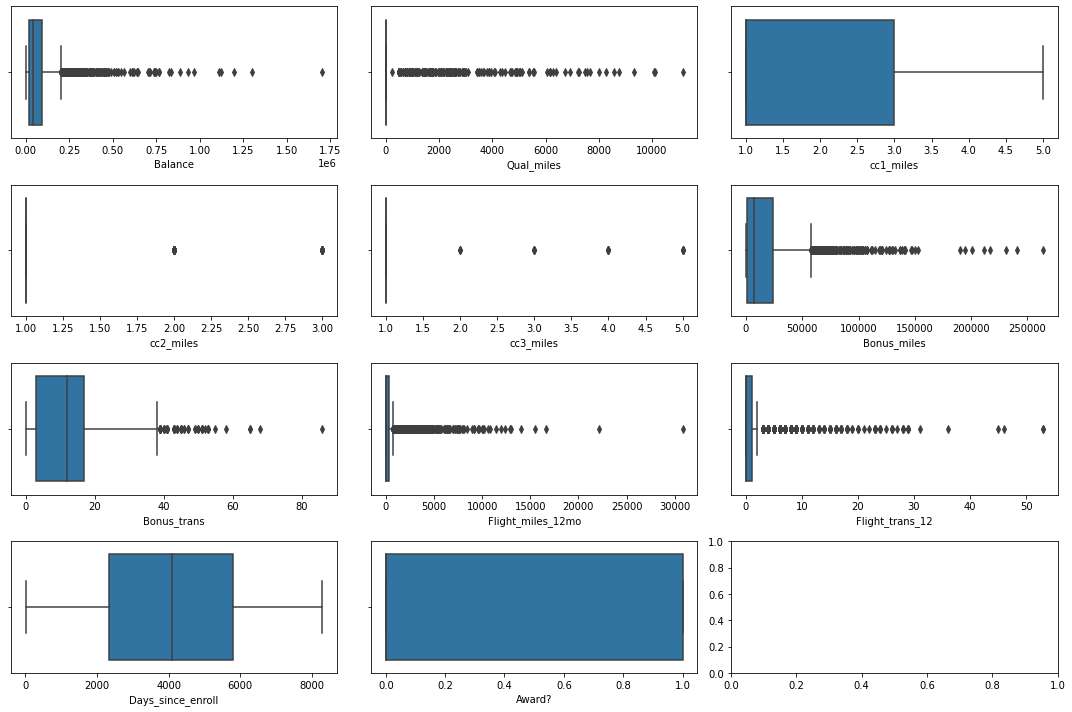

In [17]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.boxplot(Airlines1.Balance, ax=ax[0,0])
sns.boxplot(Airlines1.Qual_miles, ax=ax[0,1])
sns.boxplot(Airlines1.cc1_miles, ax=ax[0,2])
sns.boxplot(Airlines1.cc2_miles, ax=ax[1,0])
sns.boxplot(Airlines1.cc3_miles, ax=ax[1,1])
sns.boxplot(Airlines1.Bonus_miles, ax=ax[1,2])
sns.boxplot(Airlines1.Bonus_trans, ax=ax[2,0])
sns.boxplot(Airlines1.Flight_miles_12mo, ax=ax[2,1])
sns.boxplot(Airlines1. Flight_trans_12, ax=ax[2,2])
sns.boxplot(Airlines1.Days_since_enroll, ax=ax[3,0])
sns.boxplot(Airlines1["Award?"] , ax=ax[3,1])
plt.tight_layout()
plt.show()

# Distribution of all Attributes

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

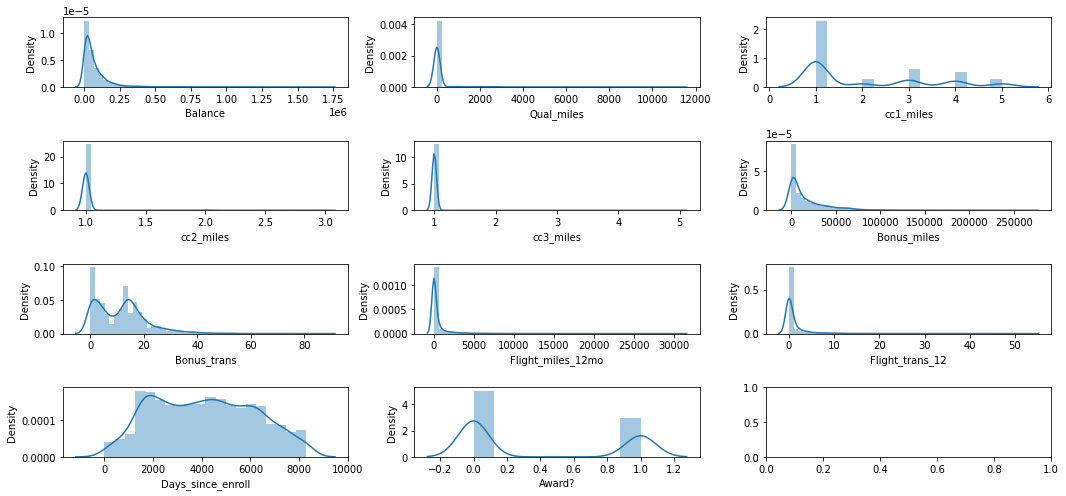

In [18]:
fig, ax = plt.subplots(4, 3, figsize=(15,7))
sns.distplot(Airlines1.Balance, ax=ax[0,0])
sns.distplot(Airlines1.Qual_miles, ax=ax[0,1])
sns.distplot(Airlines1.cc1_miles, ax=ax[0,2])
sns.distplot(Airlines1.cc2_miles, ax=ax[1,0])
sns.distplot(Airlines1.cc3_miles, ax=ax[1,1])
sns.distplot(Airlines1.Bonus_miles, ax=ax[1,2])
sns.distplot(Airlines1.Bonus_trans, ax=ax[2,0])
sns.distplot(Airlines1.Flight_miles_12mo, ax=ax[2,1])
sns.distplot(Airlines1. Flight_trans_12, ax=ax[2,2])
sns.distplot(Airlines1.Days_since_enroll, ax=ax[3,0])
sns.distplot(Airlines1["Award?"] , ax=ax[3,1])
plt.tight_layout()
plt.show()

# Now we will use power transform for standrised the distrubution

In [19]:
from sklearn.preprocessing import power_transform
# Extract the specific column and convert it as a numpy array
Airlines2 = Airlines1[["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"]].values
# Transform the data
Airlines2_transformed = power_transform(Airlines2, method='yeo-johnson')

C:\Users\Home\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [20]:
Airlines2=pd.DataFrame(Airlines2_transformed,columns=["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"]) 
Airlines2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.346816,-0.244743,-0.844766,0.0,0.0,-1.178402,-1.329671,-0.683308,-0.674970,1.321776,-0.766919
1,-0.633084,-0.244743,-0.844766,0.0,0.0,-1.132416,-1.074960,-0.683308,-0.674970,1.308873,-0.766919
2,-0.038549,-0.244743,-0.844766,0.0,0.0,-0.191941,-0.688822,-0.683308,-0.674970,1.335468,-0.766919
3,-0.821989,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,-0.683308,-0.674970,1.302415,-0.766919
4,0.723596,-0.244743,1.343165,0.0,0.0,1.169363,1.329711,1.549026,1.685925,1.295549,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.662730,-0.244743,-0.844766,0.0,0.0,0.153811,-0.688822,1.346970,1.081077,-1.364712,1.303918
3995,0.340486,-0.244743,-0.844766,0.0,0.0,-0.727886,-0.530613,-0.683308,-0.674970,-1.369774,1.303918
3996,0.460388,-0.244743,1.058591,0.0,0.0,0.795077,-0.134235,-0.683308,-0.674970,-1.365345,1.303918
3997,0.200904,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,1.446453,1.081077,-1.365977,-0.766919


# After the transformation we will see the distribution of the data

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

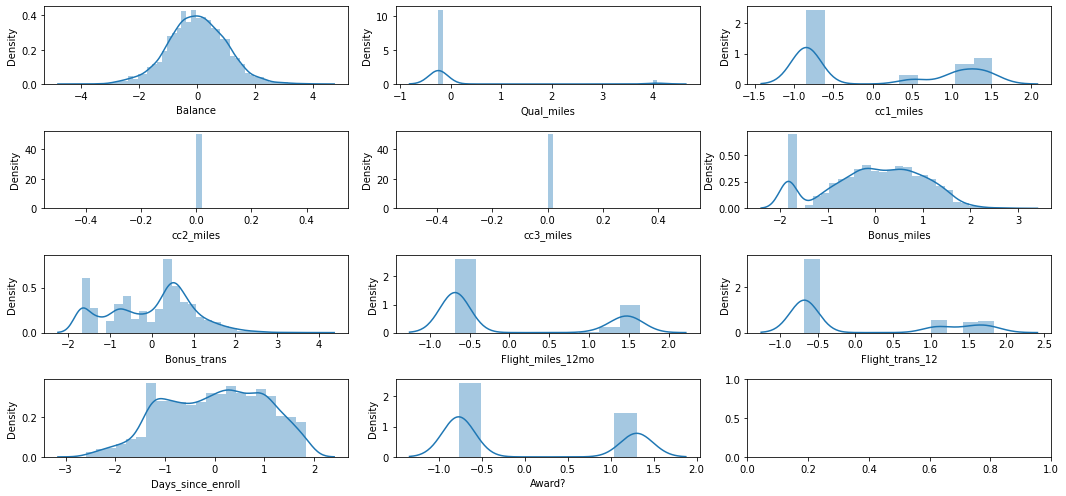

In [21]:
fig, ax = plt.subplots(4, 3, figsize=(15,7))
sns.distplot(Airlines2.Balance, ax=ax[0,0])
sns.distplot(Airlines2.Qual_miles, ax=ax[0,1])
sns.distplot(Airlines2.cc1_miles, ax=ax[0,2])
sns.distplot(Airlines2.cc2_miles, ax=ax[1,0])
sns.distplot(Airlines2.cc3_miles, ax=ax[1,1])
sns.distplot(Airlines2.Bonus_miles, ax=ax[1,2])
sns.distplot(Airlines2.Bonus_trans, ax=ax[2,0])
sns.distplot(Airlines2.Flight_miles_12mo, ax=ax[2,1])
sns.distplot(Airlines2.Flight_trans_12, ax=ax[2,2])
sns.distplot(Airlines2.Days_since_enroll, ax=ax[3,0])
sns.distplot(Airlines2["Award?"] , ax=ax[3,1])
plt.tight_layout()
plt.show()

# Cluster formation using hierarchical clustering

# Applying average linkage method

Text(0.5, 1.0, 'Dendogram')

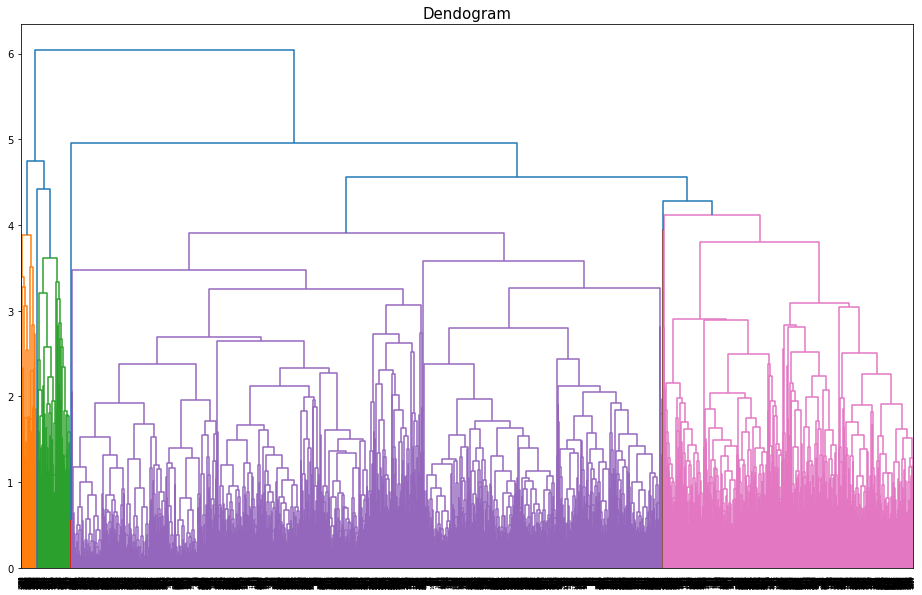

In [22]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='average'))
plt.title("Dendogram",size=15)


Create Cluster

In [23]:
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [24]:
y_hc1 = hc1.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])

In [25]:
Airlines['cluster'] = y_hc1

In [26]:
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1799.350993,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
1,1,1891.090828,104075.087266,0.000000,2.290294,1.017809,1.016919,23897.578807,15.159394,1291.878896,3.845058,4368.430098,0.547640
2,2,1425.000000,125.000000,0.000000,1.000000,1.000000,1.000000,125.000000,1.000000,125.000000,1.000000,5163.500000,0.000000
3,3,2028.933333,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
4,4,2079.624622,55659.328172,0.000000,1.951662,1.013595,1.010574,13694.672961,9.761329,0.000000,0.000000,3991.476586,0.271903


In [31]:
for i in range(5):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 151

cluster 1
Total Members: 1123

cluster 2
Total Members: 2

cluster 3
Total Members: 75

cluster 4
Total Members: 2648



# Applying centroid(ward) linkage method

Text(0.5, 1.0, 'Dendogram')

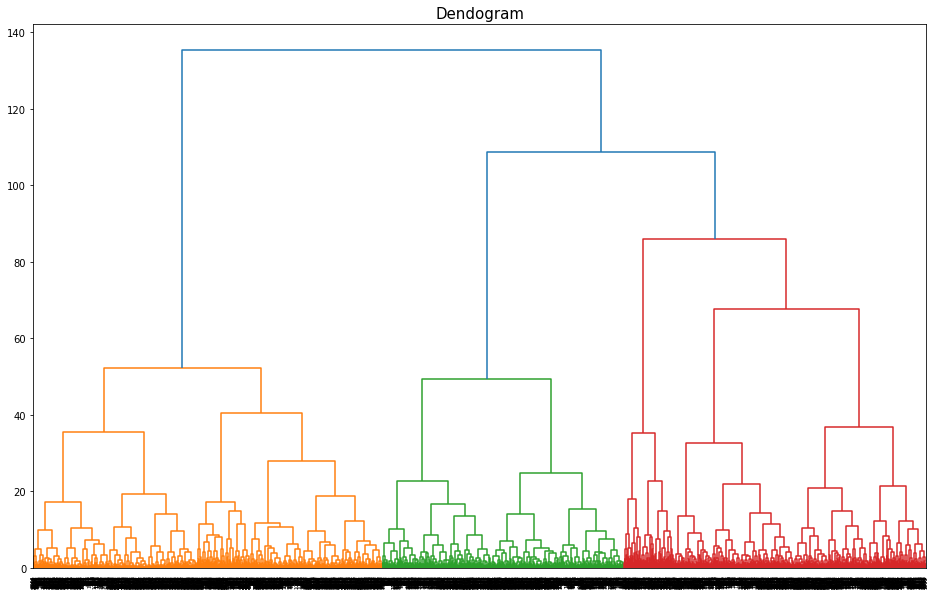

In [28]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='ward'))
plt.title("Dendogram",size=15)


# Create Cluster

In [32]:
hc2 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

In [33]:
y_hc2 = hc2.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])


In [34]:
Airlines['cluster'] = y_hc2

In [35]:
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2270.985322,33419.559030,0.000000,1.000000,1.022336,1.005105,2837.693044,5.463944,0.000000,0.000000,3631.267390,0.151883
1,1,2113.270270,77788.952703,0.000000,1.000000,1.030405,1.000000,6038.932432,8.885135,1403.608108,4.155405,3981.564189,0.429054
2,2,1802.231267,87897.735430,0.000000,3.331175,1.000925,1.018501,29432.774283,15.990749,0.000000,0.000000,4513.629972,0.445883
3,3,1875.539823,133049.712389,2550.061947,2.185841,1.008850,1.008850,24165.995575,15.584071,1720.057522,5.190265,4356.703540,0.646018
4,4,1642.568480,132880.887430,0.000000,3.718574,1.003752,1.035647,43643.870544,22.075047,1163.403377,3.489681,4801.103189,0.677298


In [36]:
for i in range(5):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1567

cluster 1
Total Members: 592

cluster 2
Total Members: 1081

cluster 3
Total Members: 226

cluster 4
Total Members: 533



# Applying complete linkage method

Text(0.5, 1.0, 'Dendogram')

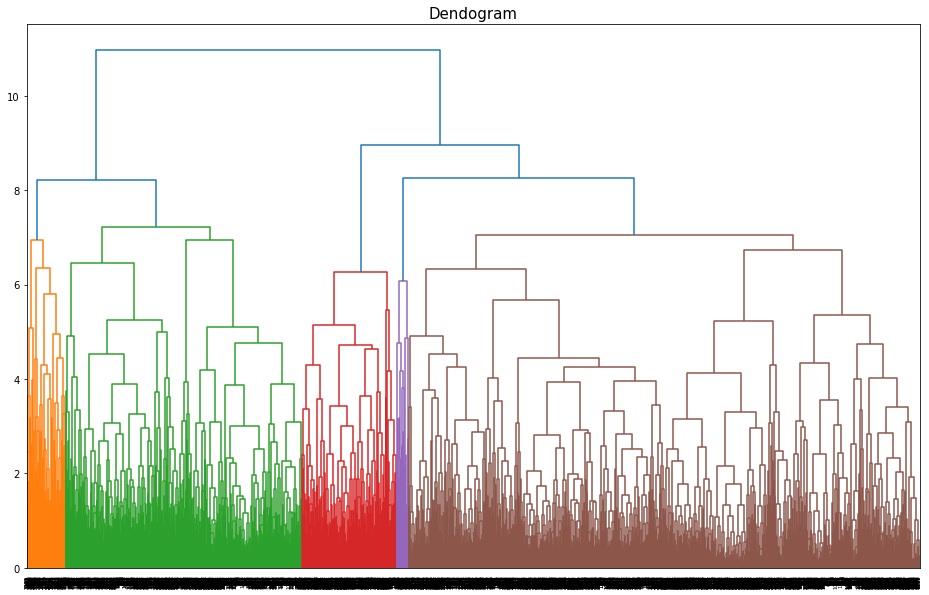

In [37]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='complete'))
plt.title("Dendogram",size=15)

# Create Cluster

In [38]:
hc3 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [40]:
y_hc3 = hc3.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])

In [41]:
Airlines['cluster'] = y_hc3

In [42]:
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1475.911404,145838.029218,0.000000,3.541942,1.004713,1.032045,39928.083883,19.713478,809.139491,2.377003,5095.663525,0.553252
1,1,2168.733392,39231.260927,0.000000,1.506119,1.016608,1.005682,7506.878497,7.910839,53.164773,0.161713,3831.724213,0.220717
2,2,2607.044811,46620.754717,0.000000,1.268868,1.030660,1.000000,8399.268868,9.099057,1110.594340,3.367925,3094.386792,0.573113
3,3,2367.264151,46202.320755,2805.528302,1.000000,1.000000,1.000000,2909.528302,3.962264,188.245283,0.566038,3446.471698,0.264151
4,4,1724.895954,159656.138728,2471.797688,2.549133,1.011561,1.011561,30678.092486,19.144509,2189.341040,6.606936,4635.560694,0.763006


In [43]:
for i in range(5):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1061

cluster 1
Total Members: 2288

cluster 2
Total Members: 424

cluster 3
Total Members: 53

cluster 4
Total Members: 173



# Applying signle linkage method

Text(0.5, 1.0, 'Dendogram')

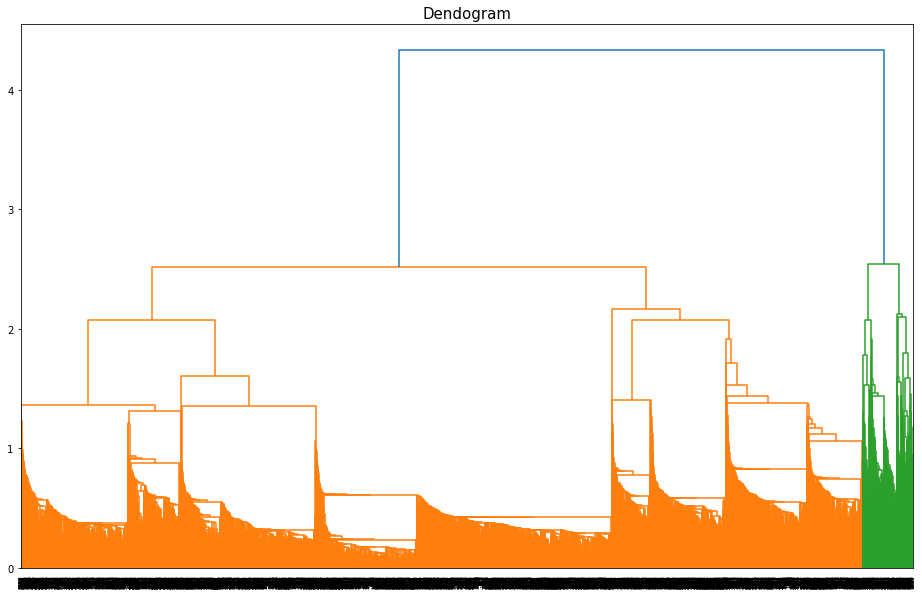

In [44]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='single'))
plt.title("Dendogram",size=15)

# Create Cluster

In [45]:
hc4 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')
y_hc4 = hc4.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])
Airlines['cluster'] = y_hc4
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2028.933333,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
1,1,1799.350993,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
2,2,3018.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5491.000000,18.000000,2116.000000,5.000000,3204.000000,1.000000
3,3,2079.624622,55659.328172,0.000000,1.951662,1.013595,1.010574,13694.672961,9.761329,0.000000,0.000000,3991.476586,0.271903
4,4,1889.258897,103982.716192,0.000000,2.289146,1.017794,1.016904,23871.654804,15.131673,1289.069395,3.838968,4370.880783,0.546263


In [46]:
for i in range(5):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 75

cluster 1
Total Members: 151

cluster 2
Total Members: 1

cluster 3
Total Members: 2648

cluster 4
Total Members: 1124



# Applying K-means clustering

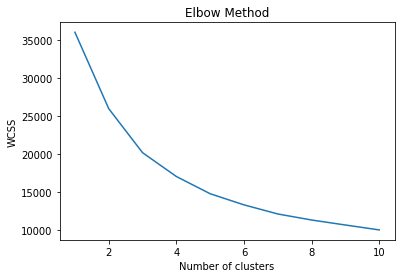

In [47]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(Airlines2_transformed)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(Airlines2_transformed)

KMeans(n_clusters=5, random_state=42)

In [49]:
KM_label=clusters_new.labels_
Airlines['cluster'] = clusters_new.labels_
clusters_new.cluster_centers_

array([[-0.67521284, -0.23299118, -0.83559045,  0.        ,  0.        ,
        -0.90908093, -0.81943355, -0.68208419, -0.67377899, -0.31097105,
        -0.51403548],
       [ 0.3716131 , -0.2447433 ,  0.91050667,  0.        ,  0.        ,
         0.71778185,  0.59247143, -0.68330804, -0.67497033,  0.23901663,
         0.18155587],
       [ 0.01600745, -0.2447433 , -0.81923926,  0.        ,  0.        ,
        -0.27910528, -0.27226266,  1.45172819,  1.43587521, -0.09525881,
         0.07153496],
       [ 0.75450559, -0.2447433 ,  1.11374957,  0.        ,  0.        ,
         1.03665259,  1.04603128,  1.45646102,  1.41053352,  0.35829033,
         0.67251944],
       [ 0.59561724,  4.08591363,  0.06270738,  0.        ,  0.        ,
         0.37140654,  0.40074101,  0.79577474,  0.85126029,  0.15196421,
         0.59498281]])

In [50]:
A=Airlines .iloc[:,1:].groupby('cluster').agg(['mean']).reset_index()

In [51]:
A

,cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,28510.248982,8.273406,1.006784,1.015604,1.000000,2228.580054,4.679104,0.033921,0.000678,3501.601764,0.122117
1,1,89382.907549,0.000000,3.128923,1.011026,1.023749,27971.685327,16.074640,0.000000,0.000000,4593.606446,0.458015
2,2,69243.130890,0.000000,1.020942,1.026178,1.000000,5429.420593,8.059337,1211.178010,3.598604,3907.469459,0.404887
3,3,140109.272232,0.000000,3.607985,1.009074,1.034483,43060.114338,22.517241,1373.820327,4.096189,4849.402904,0.695100
4,4,135354.193694,2541.076577,2.207207,1.009009,1.009009,24601.418919,15.864865,1751.049550,5.283784,4422.950450,0.657658


In [52]:
for i in range(5):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1474

cluster 1
Total Members: 1179

cluster 2
Total Members: 573

cluster 3
Total Members: 551

cluster 4
Total Members: 222



# Applying DBSCAN clustering technique

In [53]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(Airlines2)

DBSCAN(eps=0.8, min_samples=6)

In [54]:
dbscan.labels_

array([0, 0, 0, ..., 4, 6, 0], dtype=int64)

In [55]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [56]:

cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,3
3995,5
3996,4
3997,6


In [57]:
Airlines3 = pd.concat([Airlines,cl],axis=1)

In [58]:

Airlines3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,5
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,6


In [59]:
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [60]:
from sklearn import metrics

In [61]:
#Calculating silhouette score for average linkage method
print(metrics.silhouette_score(Airlines2_transformed,y_hc1))

0.24511194875209383


In [62]:
#Calculating silhouette score for centroid(ward) linkage method
print(metrics.silhouette_score(Airlines2_transformed,y_hc2))

0.3240550069814065


In [63]:
#Calculating silhouette score for complete linkage method
print(metrics.silhouette_score(Airlines2_transformed,y_hc3))

0.19985213995606269


In [64]:
#Calculating silhouette score for single linkage method
print(metrics.silhouette_score(Airlines2_transformed,y_hc4)

SyntaxError: unexpected EOF while parsing (<ipython-input-64-4c14176d090a>, line 2)

In [ ]:

#Calculating silhouette score for K Means method
print(metrics.silhouette_score(Airlines2_transformed,clusters_new.labels_))

# Conclusion:-After applying of different type of hierarchical clustering & Kmeans method we found that kmeans clustering is sensitive for outlier but giving high silhouette score & hierarchical clusterical are way more complex to understable & centroid linkage give better result its silhouette score is similar to kmeans clustering, in heirarchical cluster other linkage method have biased clustering means 70% data is belongs to only one cluster so we are predict the result only kmeans clustering

# 5 clusters are perfect for making infrences on the data